<a href="https://colab.research.google.com/github/tiiagoo321/mentoria_github/blob/main/regress_o_linear_multi_sklearn_prati.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

In [ ]:
#Importando arquivos
credito = pd.read_excel("/content/Limite_Credito_Dummy.xlsx")
credito.head()


,Idade,RendimentoTotal,Salario,LimitedeCreditoImediato,Escolaridade,Gênero,Região,LimitedoChequeEspecial
0,70,10736,5214,400,Fundamental_Medio,RJ,F,500
1,68,5000,5000,380,Fundamental_Medio,RJ,F,600
2,44,5800,5800,500,Fundamental_Medio,RJ,F,800
3,72,4300,4300,2000,Fundamental_Medio,RJ,F,1000
4,75,4400,4400,3000,Fundamental_Medio,RJ,F,1000


Outro método para fazer as transformações de categoria em numero que nem nas dummies so que outro método

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
#escolaridade
le.fit(credito.Escolaridade)
credito.Escolaridade = le.transform(credito.Escolaridade)

# gênero
le.fit(credito.Gênero)
credito.Gênero = le.transform(credito.Gênero)

#regiao
le.fit(credito.Região)
credito.Região = le.transform(credito.Região)

In [ ]:
credito.head()

,Idade,RendimentoTotal,Salario,LimitedeCreditoImediato,Escolaridade,Gênero,Região,LimitedoChequeEspecial
0,70,10736,5214,400,0,0,0,500
1,68,5000,5000,380,0,0,0,600
2,44,5800,5800,500,0,0,0,800
3,72,4300,4300,2000,0,0,0,1000
4,75,4400,4400,3000,0,0,0,1000


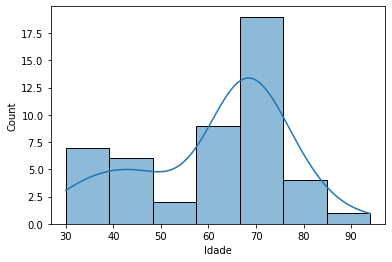

In [ ]:
sns.histplot(credito, x="Idade", kde=True)


In [ ]:
credito.describe()

,Idade,RendimentoTotal,Salario,LimitedeCreditoImediato,Escolaridade,Gênero,Região,LimitedoChequeEspecial
count,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000
mean,61.458333,12275.083333,10507.125000,2175.208333,0.375000,0.458333,0.500000,5620.729167
std,15.284477,12640.654241,9332.173617,938.094469,0.489246,0.503534,0.505291,6131.900367
min,30.000000,4300.000000,4027.000000,340.000000,0.000000,0.000000,0.000000,500.000000
25%,47.000000,6380.000000,5950.000000,1925.000000,0.000000,0.000000,0.000000,2262.500000
50%,66.500000,8400.000000,7400.000000,2000.000000,0.000000,0.000000,0.500000,3550.000000
75%,70.000000,12378.250000,10163.000000,3000.000000,1.000000,1.000000,1.000000,6500.000000
max,94.000000,81000.000000,54500.000000,3500.000000,1.000000,1.000000,1.000000,35000.000000


Transformação

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scarler = MinMaxScaler()

credito_norm = pd.DataFrame(scarler.fit_transform(credito), index=credito.index, columns=credito.columns)

In [ ]:
credito_norm.describe()

,Idade,RendimentoTotal,Salario,LimitedeCreditoImediato,Escolaridade,Gênero,Região,LimitedoChequeEspecial
count,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000
mean,0.491536,0.103978,0.128388,0.580762,0.375000,0.458333,0.500000,0.148427
std,0.238820,0.164806,0.184894,0.296865,0.489246,0.503534,0.505291,0.177736
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.265625,0.027119,0.038100,0.501582,0.000000,0.000000,0.000000,0.051087
50%,0.570312,0.053455,0.066828,0.525316,0.000000,0.000000,0.500000,0.088406
75%,0.625000,0.105323,0.121570,0.841772,1.000000,1.000000,1.000000,0.173913
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
import statsmodels.formula.api as smf

In [ ]:
#modelo MRLS
function = "LimitedoChequeEspecial~Idade+RendimentoTotal+Salario+LimitedeCreditoImediato+Escolaridade+Gênero+Região"
model = smf.ols(formula=function, data=credito_norm).fit()
print(model.summary())

                              OLS Regression Results                              
Dep. Variable:     LimitedoChequeEspecial   R-squared:                       0.886
Model:                                OLS   Adj. R-squared:                  0.865
Method:                     Least Squares   F-statistic:                     44.20
Date:                    Fri, 25 Nov 2022   Prob (F-statistic):           7.44e-17
Time:                            08:53:02   Log-Likelihood:                 67.328
No. Observations:                      48   AIC:                            -118.7
Df Residuals:                          40   BIC:                            -103.7
Df Model:                               7                                         
Covariance Type:                nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

In [ ]:
#modelo MRLS
function = "LimitedoChequeEspecial~Salario+Gênero+Região -1"
model = smf.ols(formula=function, data=credito_norm).fit()
print(model.summary())

                                   OLS Regression Results                                  
Dep. Variable:     LimitedoChequeEspecial   R-squared (uncentered):                   0.925
Model:                                OLS   Adj. R-squared (uncentered):              0.920
Method:                     Least Squares   F-statistic:                              185.0
Date:                    Fri, 25 Nov 2022   Prob (F-statistic):                    2.56e-25
Time:                            09:19:54   Log-Likelihood:                          64.573
No. Observations:                      48   AIC:                                     -123.1
Df Residuals:                          45   BIC:                                     -117.5
Df Model:                               3                                                  
Covariance Type:                nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-

In [ ]:
x = credito_norm[["Salario", "Gênero", "Região"]]

y = credito_norm[["LimitedoChequeEspecial"]]

In [ ]:
#Separando os dados de Treino e Teste
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.2, random_state=42)

#Criando um Objeto de Regressão Linear
lr = LinearRegression()

#Treinando o Modelo
lr.fit(x_treino, y_treino)


LinearRegression()

In [ ]:
##Coeficiente de Determinação (R²)
r_sq = lr.score(x, y)
print("Coeficiente de Determinação (R²):", r_sq)

Coeficiente de Determinação (R²): 0.8743700322188699


## Métricas

In [ ]:

## Treino
y_pred_treino = lr.predict(x_treino)
print('MAE:', metrics.mean_absolute_error(y_treino, y_pred_treino))
print('MSE:', metrics.mean_squared_error(y_treino, y_pred_treino))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_treino, y_pred_treino)))

MAE: 0.03369009365701896
MSE: 0.002252899550747987
RMSE: 0.04746471901052388


In [ ]:
## Teste
y_pred_teste = lr.predict(x_teste)
print('MAE:', metrics.mean_absolute_error(y_teste, y_pred_teste))
print('MSE:', metrics.mean_squared_error(y_teste, y_pred_teste))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_teste, y_pred_teste)))

MAE: 0.06987270468300606
MSE: 0.010091741419997361
RMSE: 0.10045765983735318
